# DS 680 Final Project


### Background:
Groundhog Day is an annual tradition celebrated on February 2nd in parts of the United States and Canada. The most famous Groundhog Day celebration takes place in Punxsutawney, Pennsylvania, where a groundhog named Punxsutawney Phil emerges from its burrow. According to folklore, if Punxsutawney Phil sees its shadow upon emerging, it predicts six more weeks of winter weather. However, if it doesn't see its shadow, it signifies an early arrival of spring.


The origins of Groundhog Day can be traced back to ancient European weather lore, particularly the tradition of Candlemas Day. German immigrants brought the tradition to Pennsylvania, where it evolved into the modern-day celebration of Groundhog Day.


Today, Groundhog Day has become a popular cultural event, attracting thousands of visitors to Punxsutawney each year. The event is marked by festivities, including music, food, and the eagerly anticipated prediction by Punxsutawney Phil. While the accuracy of the groundhog's prediction is a subject of debate, Groundhog Day continues to be celebrated as a lighthearted and fun way to mark the midpoint of winter and look forward to the arrival of spring.


### Project:

I will use Exploratory Data Analysis to investigate if there is actually a correlation between the groundhog not seeing its shadow and an early arrival of Spring.

For that I will use a dataset from Kaggle that contains each year of outcome from the groundghog's day and the subsequent wheather to determine if the groundhog can actually predict the early spring.

The dataset can be found at https://www.kaggle.com/code/chavezstca/groundhog-day-forecasts-eda/input.

In [1]:
#importing used libraries:
import pandas as pd
import numpy as np

In [2]:
#load dataset
gh_data = pd.read_csv("groundhog_data.csv")
gh_data.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


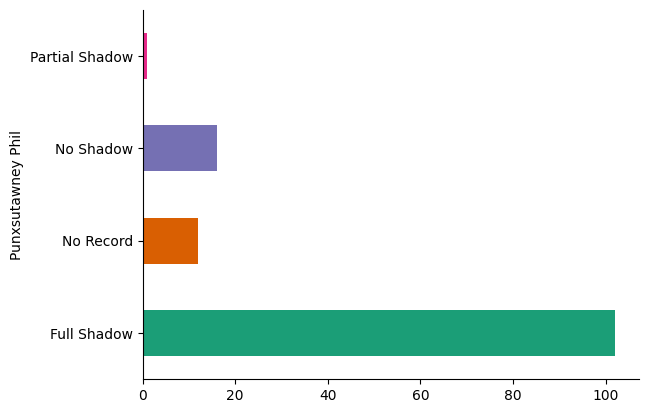

In [3]:
# @title Punxsutawney Phil outcomes

from matplotlib import pyplot as plt
import seaborn as sns
gh_data.groupby('Punxsutawney Phil').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the chart we can see that there is an uneven distribution of events from Phil. There are over 100 times in which Phil saw his full shadow. There are fewer than 20 times in which Phil saw no shadow or tha there is no record of the groundhog's day outcome.

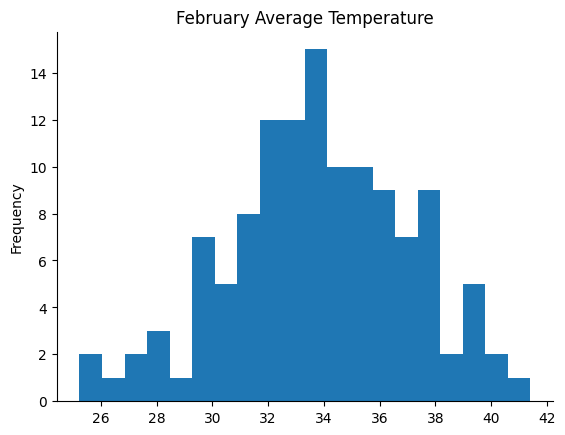

In [4]:
# @title February Average Temperature


gh_data['February Average Temperature'].plot(kind='hist', bins=20, title='February Average Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

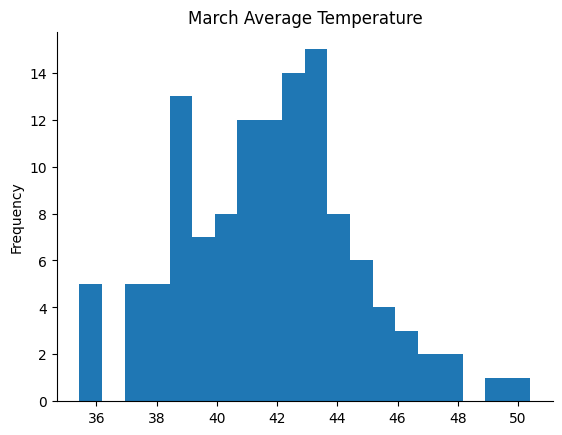

In [5]:
# @title March Average Temperature

gh_data['March Average Temperature'].plot(kind='hist', bins=20, title='March Average Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# make a new df where you drop the rows from the data where we see 'No Record' of the groundhog's day

gh_data_cleaned = gh_data.drop(gh_data.loc[gh_data['Punxsutawney Phil'] == 'No Record'].index)


In [7]:
gh_data_cleaned.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
14,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3


In [8]:
#drop any row where there is a NaN

gh_data_cleaned = gh_data_cleaned.dropna()


In [9]:
gh_data_cleaned.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
12,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
14,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
15,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
17,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
18,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0


In [10]:
gh_data_cleaned.isna().sum()

Year                                           0
Punxsutawney Phil                              0
February Average Temperature                   0
February Average Temperature (Northeast)       0
February Average Temperature (Midwest)         0
February Average Temperature (Pennsylvania)    0
March Average Temperature                      0
March Average Temperature (Northeast)          0
March Average Temperature (Midwest)            0
March Average Temperature (Pennsylvania)       0
dtype: int64

Now we have cleaned up the data. We removed all the rows where there was no record of the groundhog's day outcome, and the rows where there was null values for the average temperature.

Now let's proceed with a quick analysis of each columns data so we know with which shape of data we are dealing with.

In [11]:
gh_data_cleaned.describe( )

,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,33.928103,22.802586,32.908621,26.687069,41.834310,32.475000,42.685345,36.011207
std,3.187030,4.311531,4.695781,4.485814,2.945833,3.868622,4.554601,4.212709
min,25.230000,10.400000,20.300000,15.200000,35.440000,24.200000,28.500000,24.500000
25%,31.852500,20.075000,29.775000,23.750000,39.622500,29.775000,39.375000,33.050000
50%,33.690000,23.100000,33.200000,27.000000,42.045000,32.700000,42.900000,36.100000
75%,36.015000,26.000000,36.575000,30.025000,43.580000,34.800000,45.725000,38.625000
max,41.410000,31.600000,41.400000,35.800000,50.410000,43.400000,56.300000,47.700000


In order for us to test if the legend is true we need to check if  years when Phil sees his shadow are correlated with lower average tempteratures.

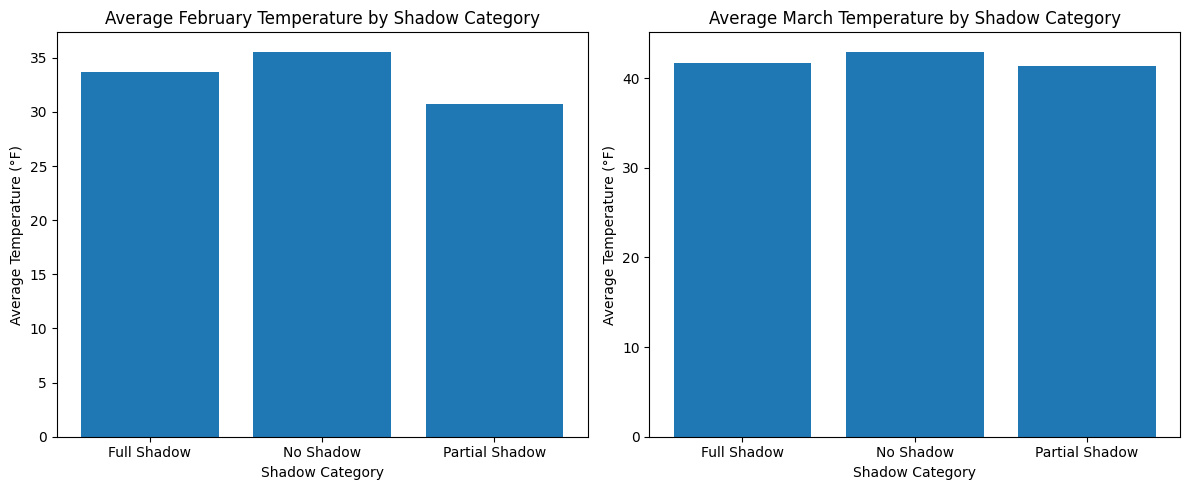

In [12]:
# Calculate the average temperature for each shadow category in February and March
feb_temps = gh_data_cleaned.groupby('Punxsutawney Phil')['February Average Temperature'].mean()
mar_temps = gh_data_cleaned.groupby('Punxsutawney Phil')['March Average Temperature'].mean()

# Create a bar chart with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the average February temperatures
ax1.bar(feb_temps.index, feb_temps.values)
ax1.set_title('Average February Temperature by Shadow Category')
ax1.set_xlabel('Shadow Category')
ax1.set_ylabel('Average Temperature (°F)')

# Plot the average March temperatures
ax2.bar(mar_temps.index, mar_temps.values)
ax2.set_title('Average March Temperature by Shadow Category')
ax2.set_xlabel('Shadow Category')
ax2.set_ylabel('Average Temperature (°F)')

# Show the plot
plt.tight_layout()
plt.show()


When plotting the average temperatures for February and March and for when Phil sees or does not see the shadow we notice that some evidence supporting the legend.

Years when Phil sees no shadow have higher average temperature than the years when the shadow is seen.

Now let's try to find out what the correlation is.

Since the Punxsutawney Phil shadow outcome is a categorical variable, in order to run a correlation between the shadow and the temperature we need to encode the variables with a number.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame
gh_data_encoded = gh_data_cleaned.copy()

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the "Punxsutawney Phil" column
gh_data_encoded['Punxsutawney Phil'] = label_encoder.fit_transform(gh_data_cleaned['Punxsutawney Phil'])

# Print the encoded DataFrame
gh_data_encoded.head()


,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
12,1898,0,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
14,1900,0,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
15,1901,0,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
17,1903,0,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
18,1904,0,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0


In [14]:
gh_data_encoded['Punxsutawney Phil'].unique()

array([0, 1, 2])

In [15]:
gh_data_encoded.tail()


,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
126,2012,0,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7
127,2013,1,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,0,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,0,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6
130,2016,1,39.47,28.1,36.9,30.8,47.50,38.8,49.5,43.4


Now that each shadow outcome is encoded as a number, we can run the correlation.

In [16]:
# Calculate the Pearson correlation coefficient between Punxsutawney Phil and February temperature
corr_feb = gh_data_encoded['Punxsutawney Phil'].corr(gh_data_encoded['February Average Temperature'], method='pearson')

# Calculate the Pearson correlation coefficient between Punxsutawney Phil and March temperature
corr_mar = gh_data_encoded['Punxsutawney Phil'].corr(gh_data_encoded['March Average Temperature'], method='pearson')

# Print the correlation coefficients
print(f"Pearson correlation coefficient between Punxsutawney Phil and February temperature: {corr_feb}")
print(f"Pearson correlation coefficient between Punxsutawney Phil and March temperature: {corr_mar}")


Pearson correlation coefficient between Punxsutawney Phil and February temperature: 0.13230358427209857
Pearson correlation coefficient between Punxsutawney Phil and March temperature: 0.12408347974714454


In this case, the Pearson correlation coefficient between Punxsutawney Phil and February temperature is 0.13230358427209857, which indicates a weak positive correlation. This means that there is a slight tendency for Punxsutawney Phil to see his shadow in years when February is warmer than average.

The Pearson correlation coefficient between Punxsutawney Phil and March temperature is 0.12408347974714454, which also indicates a weak positive correlation. This means that there is a slight tendency for Punxsutawney Phil to see his shadow in years when March is warmer than average.

However, it is important to note that these correlations are weak, which means that there is a lot of variability in the data. This means that it is not possible to make any strong conclusions about the relationship between Punxsutawney Phil and the temperature in February or March.

In [17]:
# prompt: do a hpothesis testing to see if the years with 1 as Punxsutawney Phil have significant increase in average temperature

import scipy.stats as stats

# Set the significance level
alpha = 0.05

# Extract the data
shadow_no = gh_data_encoded[gh_data_encoded['Punxsutawney Phil'] == 1]['February Average Temperature']
shadow_yes = gh_data_encoded[gh_data_encoded['Punxsutawney Phil'] == 0]['February Average Temperature']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(shadow_yes, shadow_no)

print(f"P-value: {p_value}")
print(f"t statistic: {t_statistic}")


# Make a conclusion based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that the average temperature is higher in years when Punxsutawney Phil sees his shadow.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average temperature is higher in years when Punxsutawney Phil sees his shadow.")


P-value: 0.03390537208334497
t statistic: -2.1473115003747254
Reject the null hypothesis. There is significant evidence that the average temperature is higher in years when Punxsutawney Phil sees his shadow.


I ran a hypothesis test where the null hypothesis is that there is no significant change in average temperature and the alternative hypothesis is that that there is a higher average temperature when the groundhog does not see the shadow. I picked a significance level of 0.05.

After running the test we can reject the null hypothesis and conclude that there is significant evidence that the average temperature is higher in years when Punxsutawney Phil sees his shadow. At least statistically.

While this doesn't indicate causality, it is merely a correlation that can be derived from the relationship between the shadow and the early spring.